## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [4]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

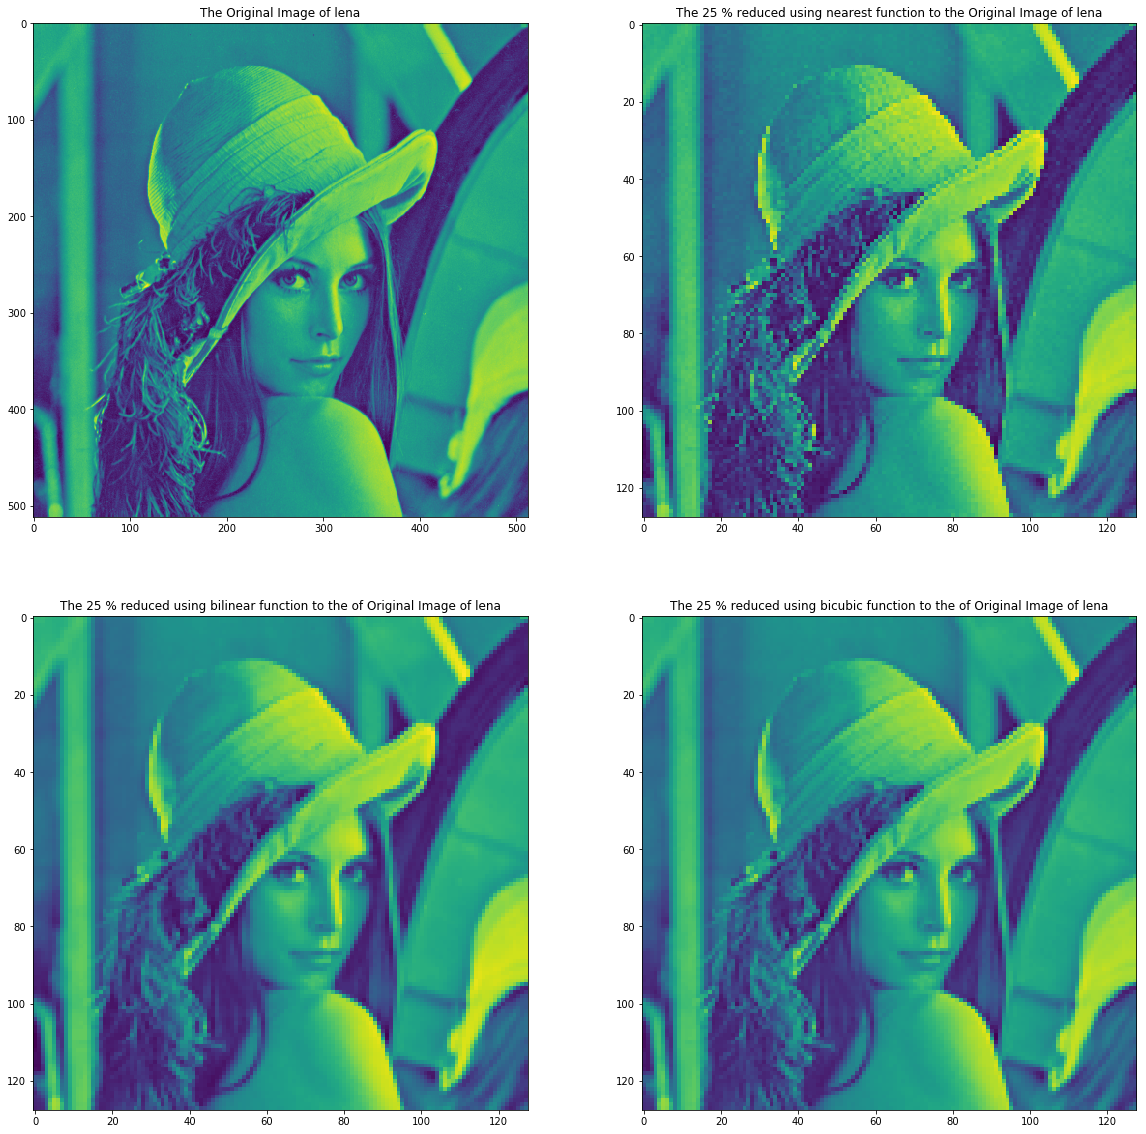

In [60]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_grey_path = img_path.__add__(img_name)
lena_grey = io.imread(lena_grey_path)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(lena_grey)
im_nearest = (misc.imresize(lena_grey, 25, interp='nearest', mode=None))
ax1.imshow(im_nearest)
im_bilinear = (misc.imresize(lena_grey, 25, interp='bilinear', mode=None))
ax2.imshow(im_bilinear)
im_bicubic = (misc.imresize(lena_grey, 25, interp='bicubic', mode=None))
ax3.imshow(im_bicubic)
ax0.set_title('The Original Image of lena')
ax1.set_title('The 25 % reduced using nearest function to the Original Image of lena')
ax2.set_title('The 25 % reduced using bilinear function to the of Original Image of lena')
ax3.set_title('The 25 % reduced using bicubic function to the of Original Image of lena')

In [34]:
misc.imresize?

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


ValueError: operands could not be broadcast together with shapes (300,300,3) (300,300) 

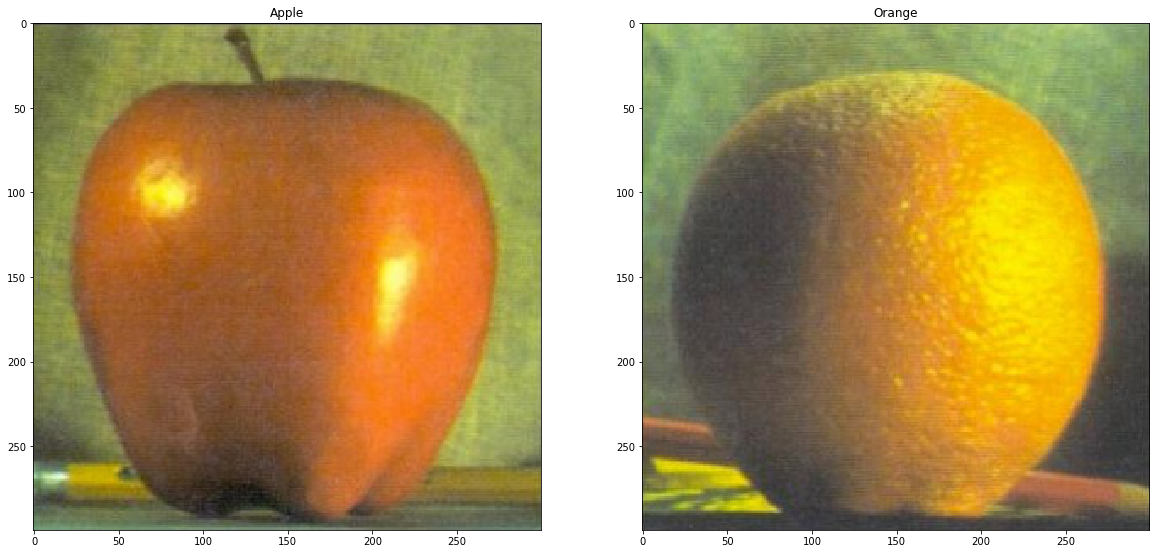

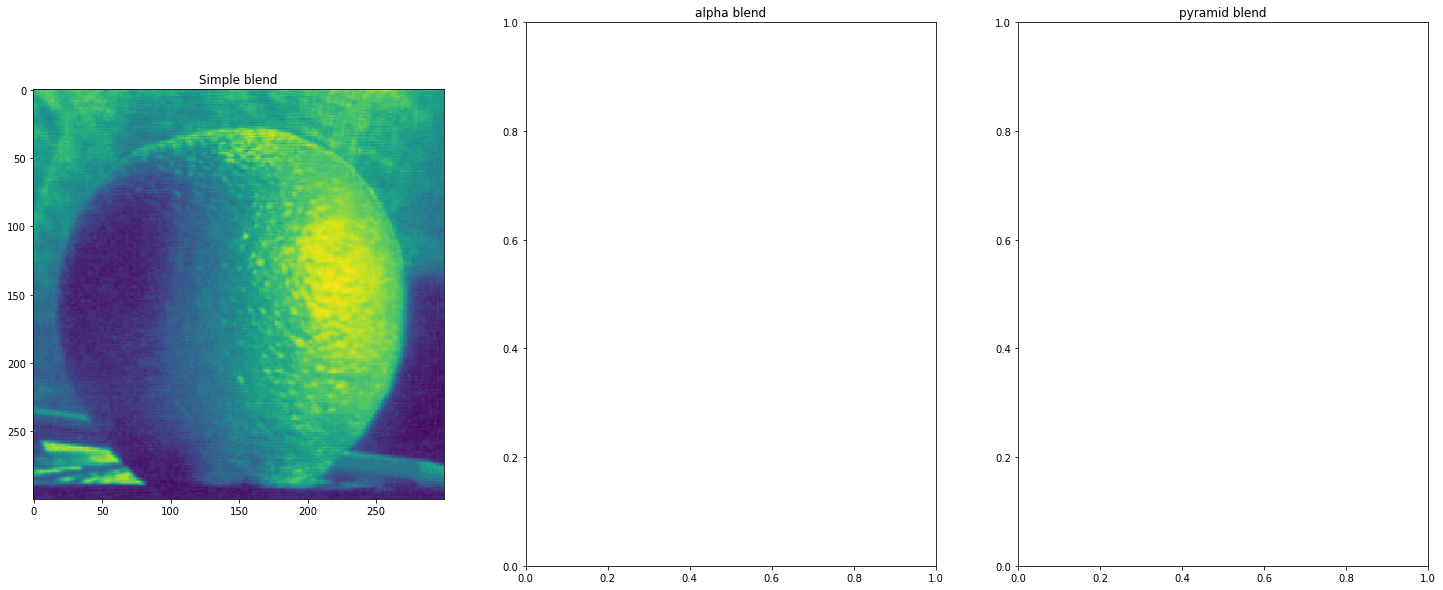

In [64]:
img_path = './images/'
img_name = 'apple.jpeg'
apple_grey_path = img_path.__add__(img_name)
apple = io.imread(apple_grey_path)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax0, ax1= axes.ravel()
ax0.set_title('Apple')
ax1.set_title('Orange')
ax0.imshow(apple)
img_name = 'orange.jpeg'
orange_grey_path = img_path.__add__(img_name)
orange = io.imread(orange_grey_path)
ax1.imshow(orange)
#now blending code
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
ax0, ax1, ax2 = axes.ravel()
ax0.set_title('Simple blend')
ax1.set_title('alpha blend')
ax2.set_title('pyramid blend')

img_path='./images/'
img_orange='orange.jpeg'
orange=io.imread(img_path.__add__(img_orange))
ax0.imshow(orange)


img_path='./images/'
img_orange='orange.jpeg'
orange=io.imread(img_path.__add__(img_orange),as_grey=True)
ax0.imshow(orange)
def blendalpha(apple, orange, alpha):

    return ( alpha * apple +  (1-alpha) * orange)
simpleblend=blendalpha(apple, orange, 0.3)
ax0.imshow(simpleblend)